# Visual results (pixel-wise class predictions and model uncertainty)

## Description

In this notebook, the main results of our best model are recreated. We show the prediction of the class labels and the model uncertainty for different images in the train, validation and test datasets, as well as for other images. In order to do so, we use the method *visual_results* from the *SegNet* class which is imported in the first code line of this notebook. The "visual_results" method can take three arguments: 
1. ***dataset_type***: A string indicating the dataset type (either "TRAIN", "VAL" or "TEST"). By default it is "TEST".
2. ***images_index***: A list indicating the images indexes from the corresponding dataset. For instance, if we pass the list [0,20,47] we are requesting the prediction for the images that are found in the indexes 0, 20 and 47 of the dataset. This parameter can also be an integer value which corresponds to the number of different images that we want to display. In this case, we randomly pick the specified number of images from the corresponding dataset. By default it is set to 3.
3. ***FLAG_MAX_VOTE***: A boolean parameter indicating whether we want to use Max Voting (True) or Mean (False) at test time for the Bayesian model. By default it is set to False.


For each of the displayed images we show (1) the original image, (2) the ground truth, i.e., the given pixel labels for training the network and obtain prediction accuracies, (3) the output of our model for the given image, and (4) the uncertainty of the model prediction (the darker the color is, the more uncertain the prediction in this pixel is).

Finally, we also show the color legend for the different classes.

## Usage

In order to run this notebook you need to have the files from https://github.com/toimcio/SegNet-tensorflow in the same directory than this notebook. Moreover, you need the 'vgg16.npy' file also in the running directory, which can be found in this link: https://mega.nz/#!YU1FWJrA!O1ywiCS2IiOlUCtCpI6HTJOMrneN-Qdv3ywQP5poecM. Finally, you need to download the saved model from https://drive.google.com/drive/folders/1tD-4FsN6s8c45R81bjqIG_f5VCS1j-Db and put the downloaded folder also in the running directory. Doing so the notebook should run without any problem. If there is any problem, make sure that the file and directory paths fit the ones from the 'config.json' file.

## Imports

In [1]:
from SegNet import SegNet
from drawings_object import display_color_legend


In [ ]:
# '''
# Automate training data output directory so as to avoid overwriting trained output.
# '''

# import time
# conf_file = 'config-GTA5.json'
# with open(conf_file) as f:
#     config = json.loads(f.read())
    
# time_now = time.ctime().lower()
# str_time = '-' + time_now[4:7] + time_now[8:10].replace(' ', '0') + '-' + time_now[11:13] + time_now[14:16]
# config["SAVE_MODEL_DIR"] = "./segnet_vgg_bayes_MFL_17000/model.ckpt-17000" + str_time

# json_object = json.dumps(config, indent=4)

# with open("config-GTA5.json", 'w') as f:
#     f.write(json_object)


## Train dataset (367 images)

In [ ]:
segnet = SegNet(conf_file='./config-GTA5.json')

In [ ]:
batch_size = 5
n_images = 2369
epoch = 100
iterations = int((n_images / batch_size) * epoch)
#segnet.train_gta5(max_steps=iterations, batch_size=batch_size)

In [ ]:
#segnet.save()

In [ ]:
#segnet.restore('./segnet_vgg_bayes_MFL_17000/gta5_model/model.ckpt-0')
#segnet.print_checkpoint(all_tensors=False, tensor_name='conv1_1/biases')

In [ ]:
SegNet(conf_file='./config-GTA5.json').restore('./segnet_vgg_bayes_MFL_17000/gta5_five_class/model.ckpt-0/model.ckpt-0')

VGG parameter loaded
INFO:tensorflow:Restoring parameters from ./segnet_vgg_bayes_MFL_17000/gta5_v2/model.ckpt-0/model.ckpt-9
290 GTA5 test images are loaded


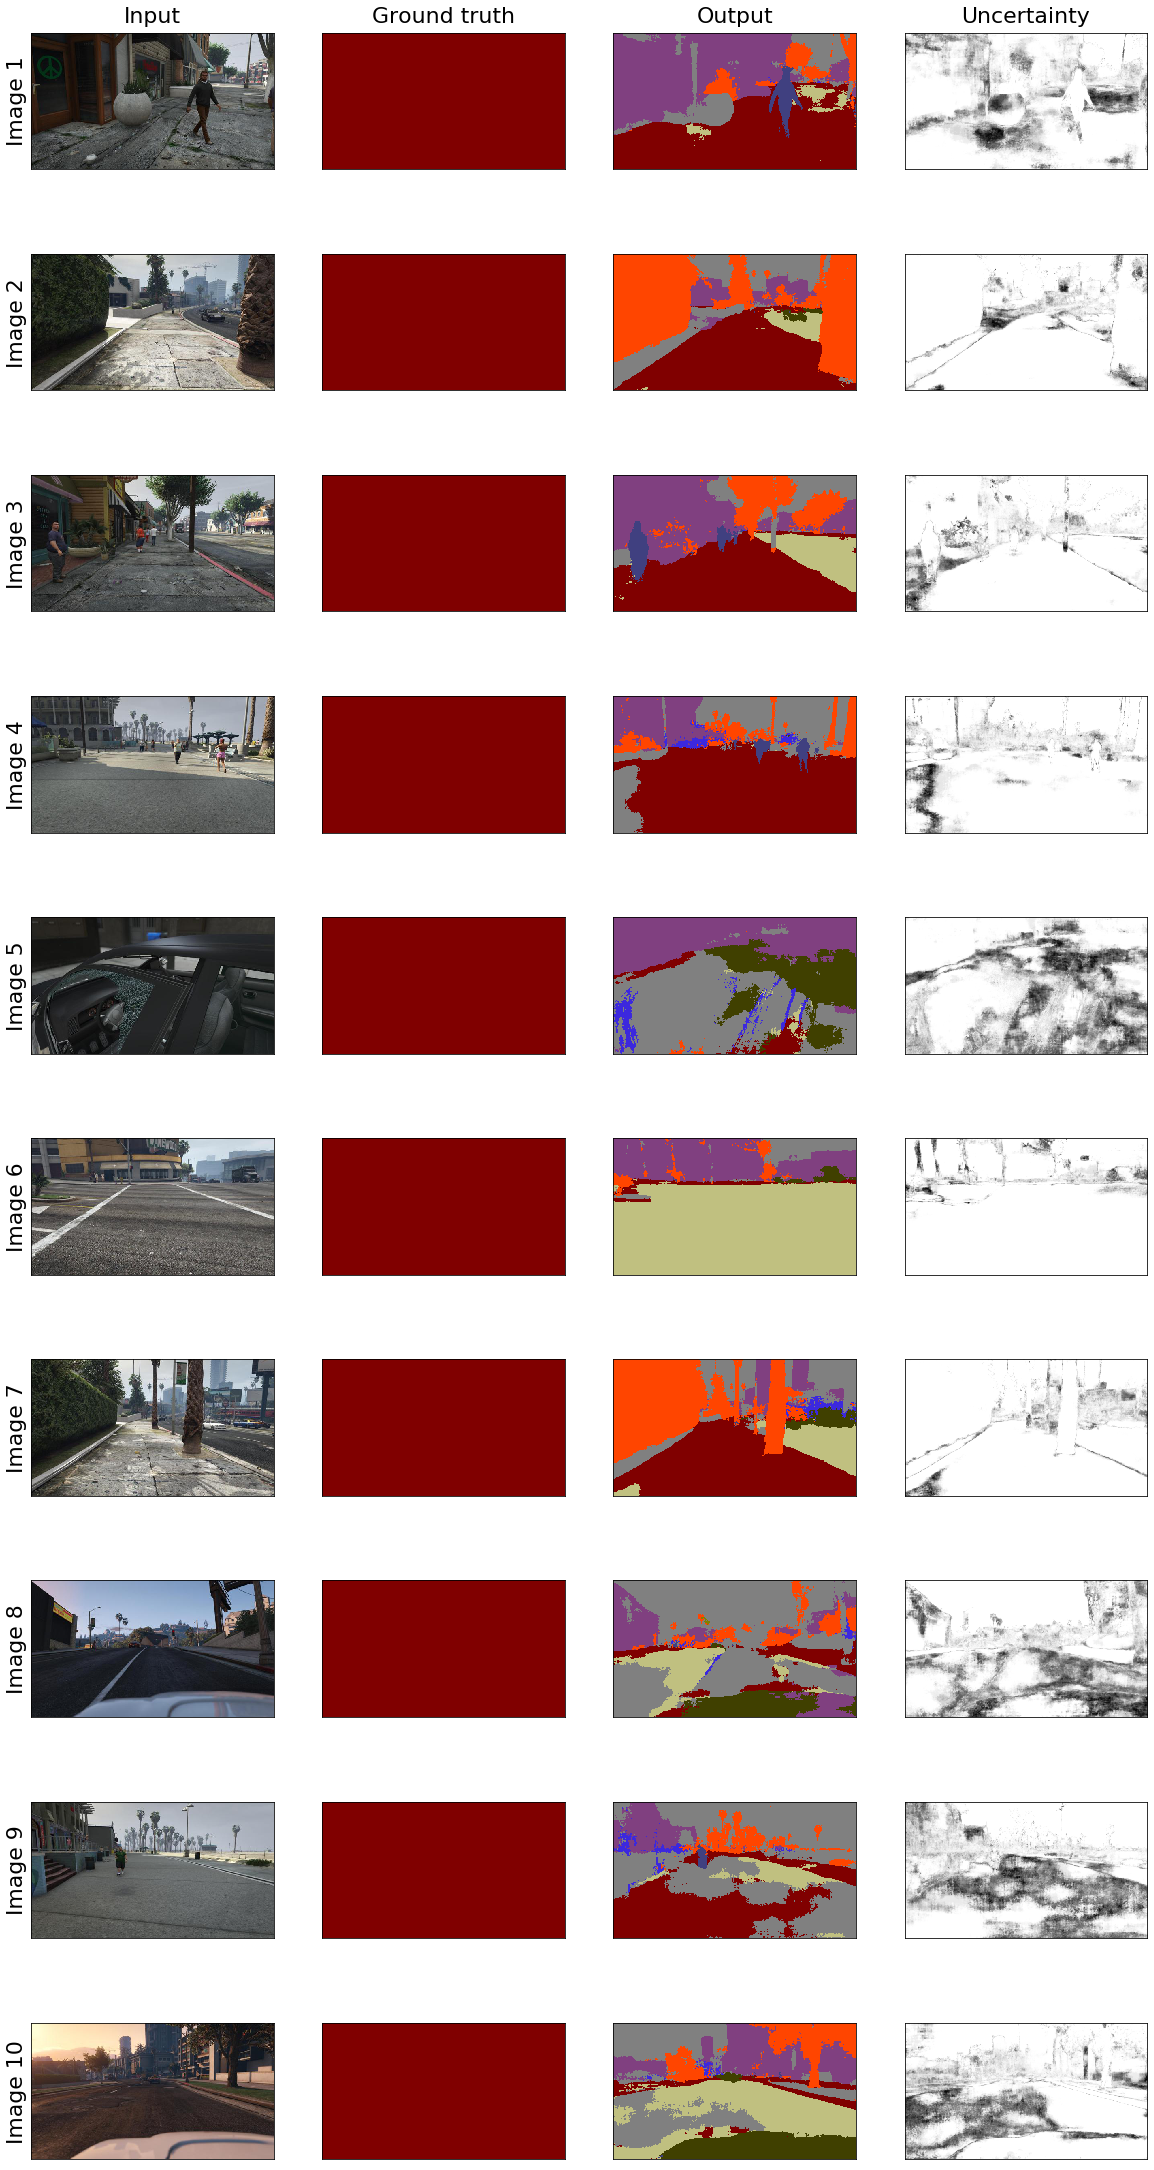

In [3]:
SegNet(conf_file='./config-GTA5_v2.json').visual_results_gta5(dataset_type = "TEST", images_index = 10, FLAG_MAX_VOTE = False)

In [ ]:
SegNet(conf_file='./config-GTA5.json').visual_results_gta5(dataset_type = "TRAIN", images_index = 10, FLAG_MAX_VOTE = False)

In [ ]:
SegNet(conf_file='./config-GTA5.json').test_gta5()